In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Toy Example 1

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=x^2"/>
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=2x"/>

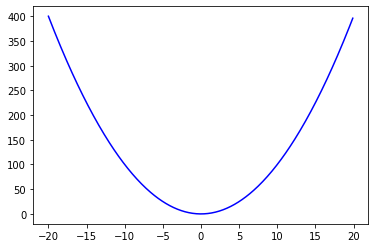

In [8]:
x = np.arange(-20, 20, 0.1)
y = x ** 2
y_der = 2 * x
plt.plot(x, y, 'b-')

In [16]:
x_GD = 100
alpha = 0.1

der = 2 * x_GD
x_GD = x_GD - alpha * der
print(x_GD)

80.0


In [23]:
x_GD = 1
alpha = 0.01

for i in range(100):
    der = 2 * x_GD
    x_GD = x_GD - alpha * der
    print(x_GD)

0.98
0.9604
0.941192
0.92236816
0.9039207968
0.885842380864
0.86812553324672
0.8507630225817856
0.8337477621301499
0.8170728068875469
0.800731350749796
0.7847167237348001
0.769022389260104
0.7536419414749019
0.7385691026454039
0.7237977205924958
0.7093217661806459
0.6951353308570329
0.6812326242398923
0.6676079717550945
0.6542558123199925
0.6411706960735927
0.6283472821521208
0.6157803365090784
0.6034647297788968
0.5913954351833188
0.5795675264796525
0.5679761759500594
0.5566166524310583
0.5454843193824371
0.5345746329947884
0.5238831403348926
0.5134054775281948
0.5031373679776309
0.4930746206180783
0.4832131282057167
0.47354886564160237
0.46407788832877034
0.45479633056219493
0.445700403950951
0.43678639587193197
0.4280506679544933
0.41948965459540344
0.41109986150349537
0.4028778642734255
0.39482030698795695
0.38692390084819783
0.37918542283123385
0.3716017143746092
0.36416968008711703
0.3568862864853747
0.3497485607556672
0.34275358954055385
0.3358985177497428
0.32918054739474795
0.

-4.0740719526689756e-09


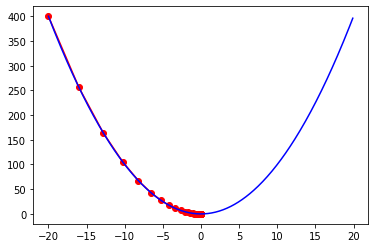

In [38]:
x_GD = [-20]
alpha = 0.1

for i in range(100):
    der = 2 * x_GD[-1]
    x_GD.append(x_GD[-1] - alpha * der)

x_GD = np.array(x_GD)
y_GD = x_GD ** 2
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

Text(0.5, 0, 'alpha')

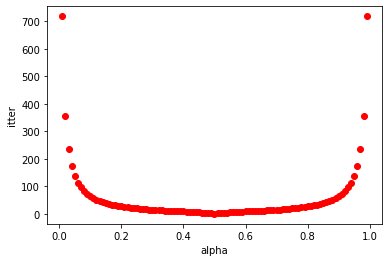

In [6]:
for alpha in np.arange(0.01, 1, 0.01):
    x_GD = 20
    for i in range(10000):
        der = 2 * x_GD
        x_GD = x_GD - alpha * der
        if np.abs(x_GD) < 1e-5:
            break
        if x_GD > 10000:
            i = 10000
            break
    plt.plot(alpha, i, 'ro')
plt.ylabel('itter')
plt.xlabel('alpha')

# Toy Example 2

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=-\frac{sin(x)}{x}"/>
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=\frac{sin(x)-xcos(x)}{x^2}"/>

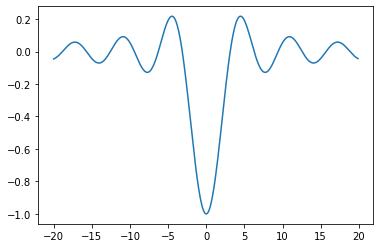

In [40]:
x = np.arange(-20, 20, 0.1)
y = -np.sin(x) / x
plt.plot(x, y)

7.616283451845944


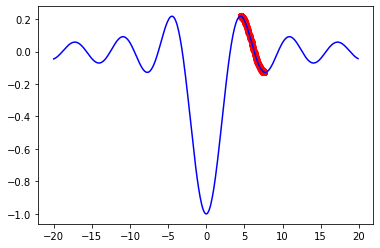

In [52]:
x_GD = [4.5]
alpha = 0.5

for i in range(100):
    der = (np.sin(x_GD[-1]) - x_GD[-1] * np.cos(x_GD[-1])) / (x_GD[-1] ** 2)
    x_GD.append(x_GD[-1] - alpha * der)

x_GD = np.array(x_GD)
y_GD = -np.sin(x_GD) / x_GD
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

# Toy Example 3

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=|x|"/>
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=\begin{cases}1&x>0\\-1&x<0\end{cases}"/>

In [53]:
def abs_call(x):
    return np.abs(x)
    
def abs_derivatives(x):
    return np.sign(x)

In [78]:
def optimize(derivatives, x0, alpha, itterations):
    x_GD = [x0]

    for i in range(itterations):
        der = derivatives(x_GD[-1])
        x_GD.append(x_GD[-1] - alpha * der)
    return np.array(x_GD)

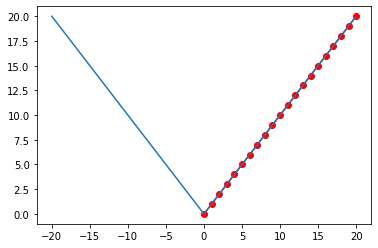

In [81]:
x_GD = optimize(abs_derivatives, 20, 1, 20)
y_GD = abs_call(x_GD)
plt.plot(x_GD, y_GD, 'r-o')

x = np.arange(-20, 20, 0.1)
y = abs_call(x)
plt.plot(x, y)

# Toy Example 3

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=-e^{-|x|}"/>
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=\frac{xe^{-|x|}}{|x|}"/>

In [82]:
def exp(x):
    return -np.exp(-np.abs(x))
    
def exp_derivatives(x):
    return x * np.exp(-np.abs(x)) / np.abs(x)

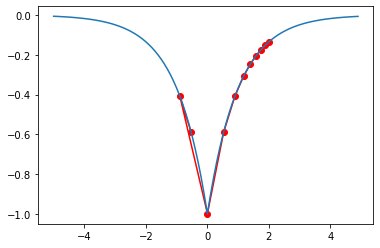

In [90]:
x_GD = optimize(exp_derivatives, 2, 0.9, 10)
y_GD = exp(x_GD)
plt.plot(x_GD, y_GD, 'r-o')

x = np.arange(-5, 5, 0.1)
y = exp(x)
plt.plot(x, y)

# Toy Example 4

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?z=ax^2 + by^2"/>
<img src="https://latex.codecogs.com/svg.latex?\begin{cases}\frac{\partial z}{\partial x}=2ax\\\frac{\partial z}{\partial y}=2by\end{cases}"/>

In [94]:
a = 1
b = 1

def quadratic(x, y):
    global a, b
    return (a * (x ** 2)) + (b * (y ** 2))
    
def quadratic_derivatives(x, y):
    global a, b
    return [2 * a * x, 2 * b *  y]

In [91]:
def optimize_3d(derivatives, x0, y0, alpha, itterations):
    points_GD = [(x0, y0)]

    for i in range(itterations):
        der_x, der_y = derivatives(points_GD[-1][0], points_GD[-1][1])
        
        new_x = points_GD[-1][0] - alpha * der_x
        new_y = points_GD[-1][1] - alpha * der_y
        
        points_GD.append((new_x, new_y))
        
    return np.array(points_GD)

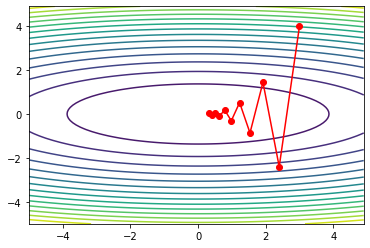

In [118]:
a = 1
b = 8

points_GD = optimize_3d(quadratic_derivatives, 3, 4, 0.1, 10)
plt.plot(points_GD[:, 0], points_GD[:, 1], 'ro-')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
z = quadratic(x, y)
plt.contour(x, y, z, levels=20)

In [100]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)

In [106]:
y

array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
       [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
       [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
       ...,
       [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
       [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
       [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]])